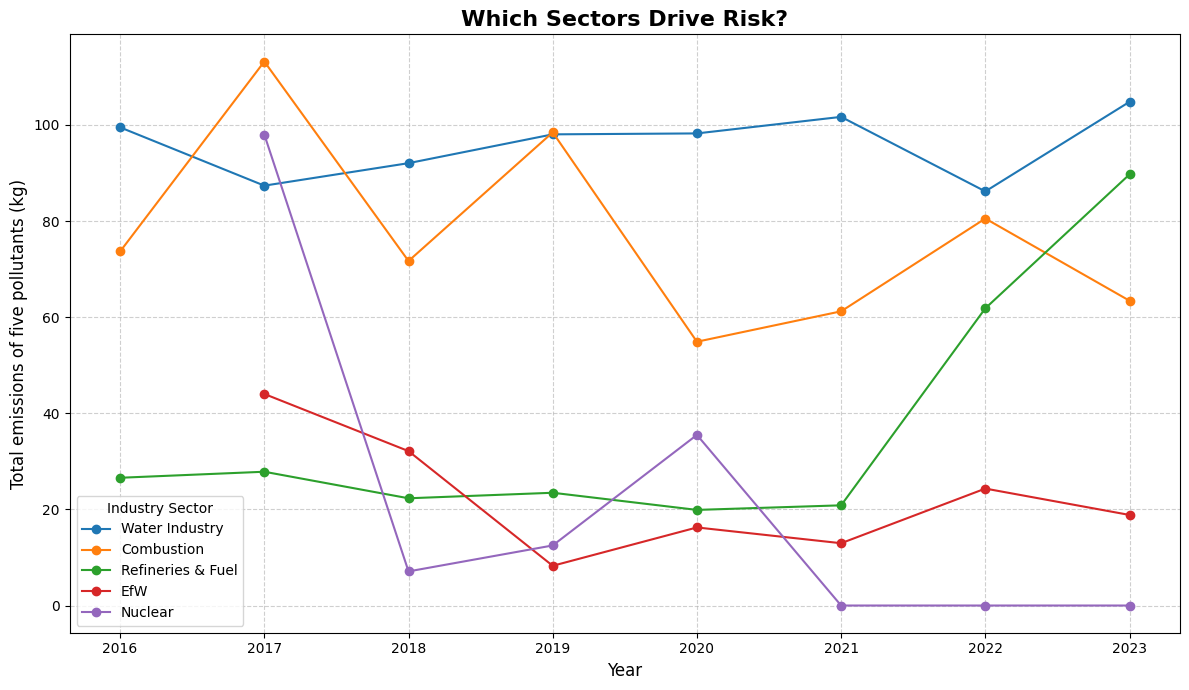

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "merged_dataset_with_year.csv"
df = pd.read_csv(file_path)

df_clean = df[['Year', 'REGULATED INDUSTRY SECTOR', 'QUANTITY RELEASED (kg)']].dropna()
df_clean['Year'] = df_clean['Year'].astype(int)

industry_trends = df_clean.groupby(['Year', 'REGULATED INDUSTRY SECTOR'])['QUANTITY RELEASED (kg)'].mean().reset_index()

top_sectors = industry_trends.groupby('REGULATED INDUSTRY SECTOR')['QUANTITY RELEASED (kg)'].mean().nlargest(5).index
top_industry_trends = industry_trends[industry_trends['REGULATED INDUSTRY SECTOR'].isin(top_sectors)]

plt.figure(figsize=(12, 7))
for sector in top_sectors:
    sector_data = top_industry_trends[top_industry_trends['REGULATED INDUSTRY SECTOR'] == sector]
    plt.plot(sector_data['Year'], sector_data['QUANTITY RELEASED (kg)'], marker='o', label=sector)

plt.title("Which Sectors Drive Risk?", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total emissions of five pollutants (kg)", fontsize=12)
plt.legend(title="Industry Sector")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


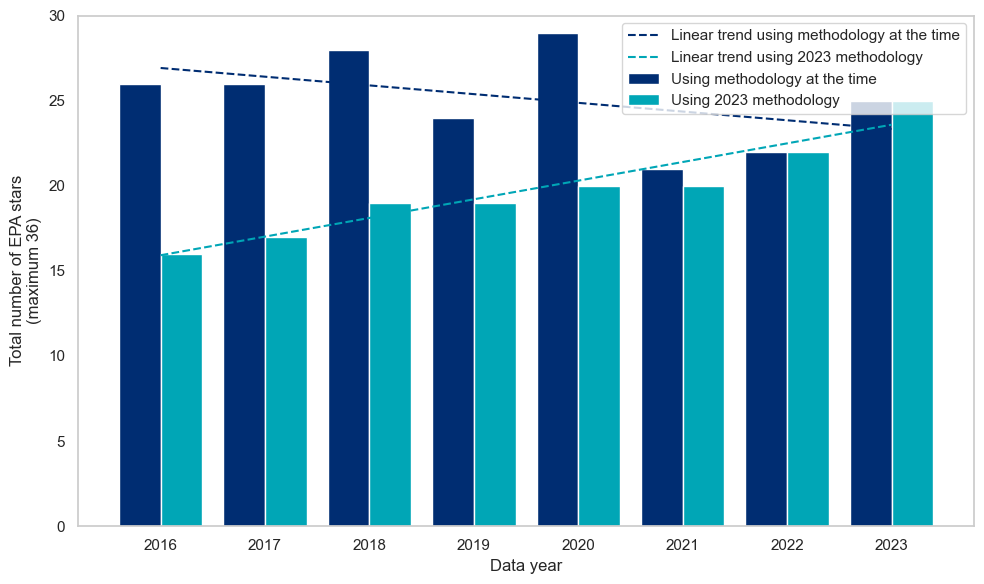

In [13]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

years = np.arange(2016, 2024)

stars_original_method = np.array([26, 26, 28, 24, 29, 21, 22, 25])
stars_2023_method = np.array([16, 17, 19, 19, 20, 20, 22, 25])

plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(years))

plt.bar(index - bar_width/2, stars_original_method, bar_width, label='Using methodology at the time', color='#002D72')
plt.bar(index + bar_width/2, stars_2023_method, bar_width, label='Using 2023 methodology', color='#00A6B6')

z1 = np.polyfit(index, stars_original_method, 1)
p1 = np.poly1d(z1)
plt.plot(index, p1(index), '--', color='#002D72', label='Linear trend using methodology at the time')

z2 = np.polyfit(index, stars_2023_method, 1)
p2 = np.poly1d(z2)
plt.plot(index, p2(index), '--', color='#00A6B6', label='Linear trend using 2023 methodology')

plt.xticks(index, years)
plt.xlabel('Data year')
plt.ylabel('Total number of EPA stars\n(maximum 36)')
plt.ylim(0, 30)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


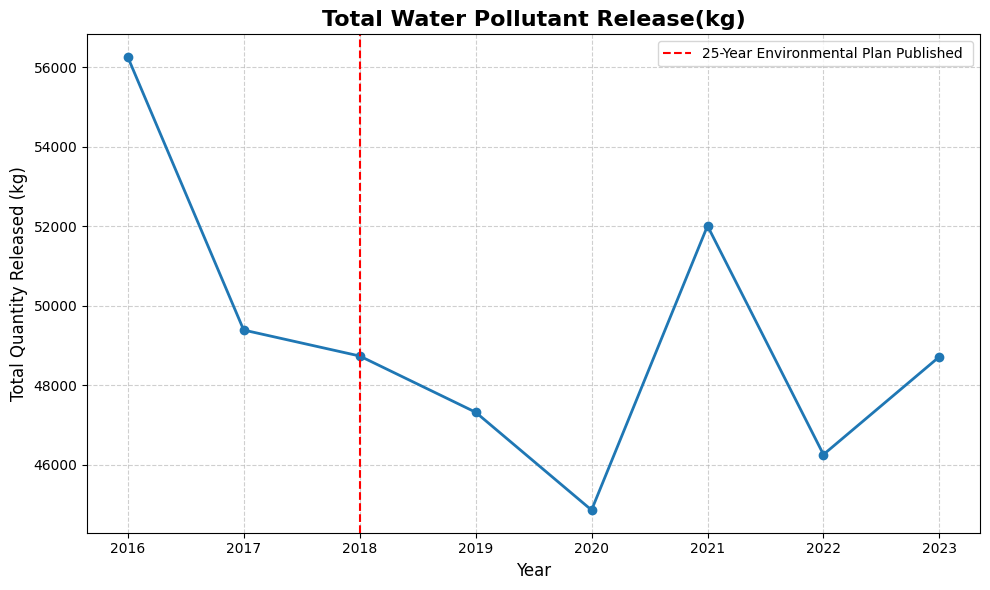

In [6]:
# Aggregate data
yearly_total = df[['Year', 'QUANTITY RELEASED (kg)']].dropna()
yearly_total = yearly_total.groupby('Year')['QUANTITY RELEASED (kg)'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_total['Year'], yearly_total['QUANTITY RELEASED (kg)'], marker='o', linewidth=2)
plt.axvline(x=2018, color='red', linestyle='--', label='25-Year Environmental Plan Published ')
plt.title('Total Water Pollutant Release(kg)', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Quantity Released (kg)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


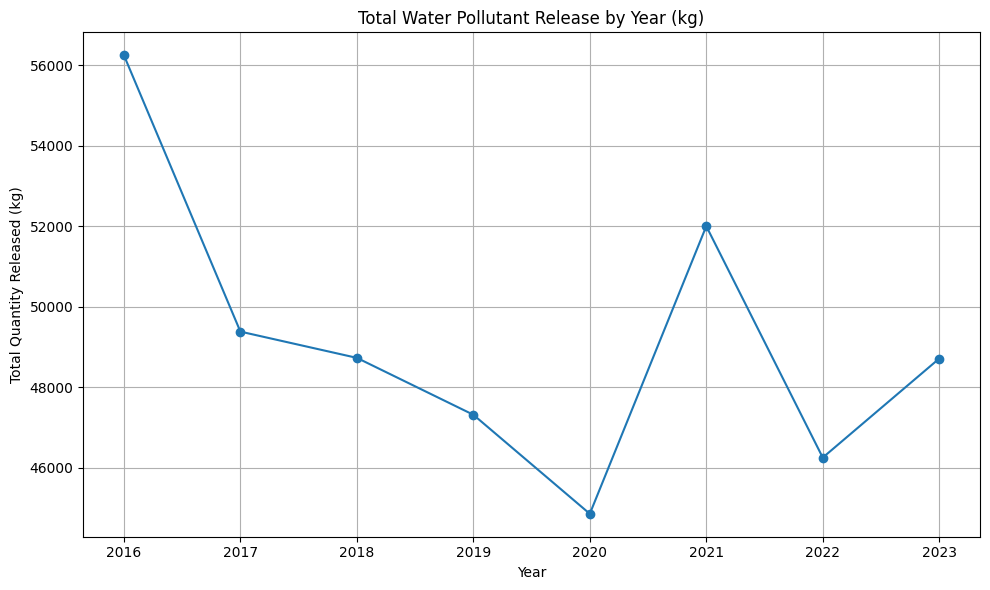

政策前（2016-2017年）平均排放量：43.59781159307559 kg
政策后（2019年及以后）平均排放量：39.542310620057535 kg
t统计量: 0.6241495502711795
p值: 0.5325629116487782
结果不显著，政策前后排放量差异不显著。


In [3]:
# Imports
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

file_path = "merged_dataset_with_year.csv"
df = pd.read_csv(file_path)

pre_policy_data = df[(df['Year'] >= 2016) & (df['Year'] <= 2017)]['QUANTITY RELEASED (kg)']
post_policy_data = df[(df['Year'] >= 2019)]['QUANTITY RELEASED (kg)']

annual_release = df.groupby('Year')['QUANTITY RELEASED (kg)'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(annual_release['Year'], annual_release['QUANTITY RELEASED (kg)'], marker='o')
plt.title("Total Water Pollutant Release by Year (kg)")
plt.xlabel("Year")
plt.ylabel("Total Quantity Released (kg)")
plt.grid(True)
plt.tight_layout()
plt.show()

pre_avg = pre_policy_data.mean()
post_avg = post_policy_data.mean()

print(f"Average emissions prior to the policy (2016–2017)：{pre_avg} kg")
print(f"Average emissions after the policy (2019 and beyond)：{post_avg} kg")

t_stat, p_value = stats.ttest_ind(pre_policy_data, post_policy_data, equal_var=False)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("The results are significant, with a marked difference in emissions before and after the policy.。")
else:
    print("The results were not significant, with no significant difference in emissions before and after the policy.")


In [17]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

file_path = "merged_dataset_with_year.csv"
df = pd.read_csv(file_path)

pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 0.00003,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}

df['PNEC (mg/L)'] = df['SUBSTANCE NAME'].map(pnec_values)
df['PNEC-normalized Emission Load'] = df['QUANTITY RELEASED (KG)'] / df['PNEC (mg/L)']

industry_pnec_pollution = df.groupby('REGULATED INDUSTRY SECTOR')['PNEC-normalized Emission Load'].sum().reset_index()

industry_pnec_pollution_sorted = industry_pnec_pollution.sort_values('PNEC-normalized Emission Load', ascending=False).head(5)

plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(industry_pnec_pollution_sorted['PNEC-normalized Emission Load'],
                                   labels=industry_pnec_pollution_sorted['REGULATED INDUSTRY SECTOR'],
                                   autopct='%1.1f%%',
                                   startangle=140,
                                   colors=plt.cm.Paired.colors,
                                   shadow=True,
                                   explode=[0.1, 0, 0, 0, 0],
                                   textprops={'fontsize': 12, 'fontweight': 'bold'},
                                   pctdistance=0.85,
                                   labeldistance=1.1)

for autotext in autotexts:
    autotext.set(fontsize=10, fontweight='bold', color='white')

plt.title("Top 5 Industry Sectors by PNEC-normalized Water Pollutant Emissions (Based on Total Pollutant Mass)", fontsize=16, fontweight='bold')

plt.legend(wedges, industry_pnec_pollution_sorted['REGULATED INDUSTRY SECTOR'], title="Industry Sectors", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.show()


KeyError: 'QUANTITY RELEASED (KG)'

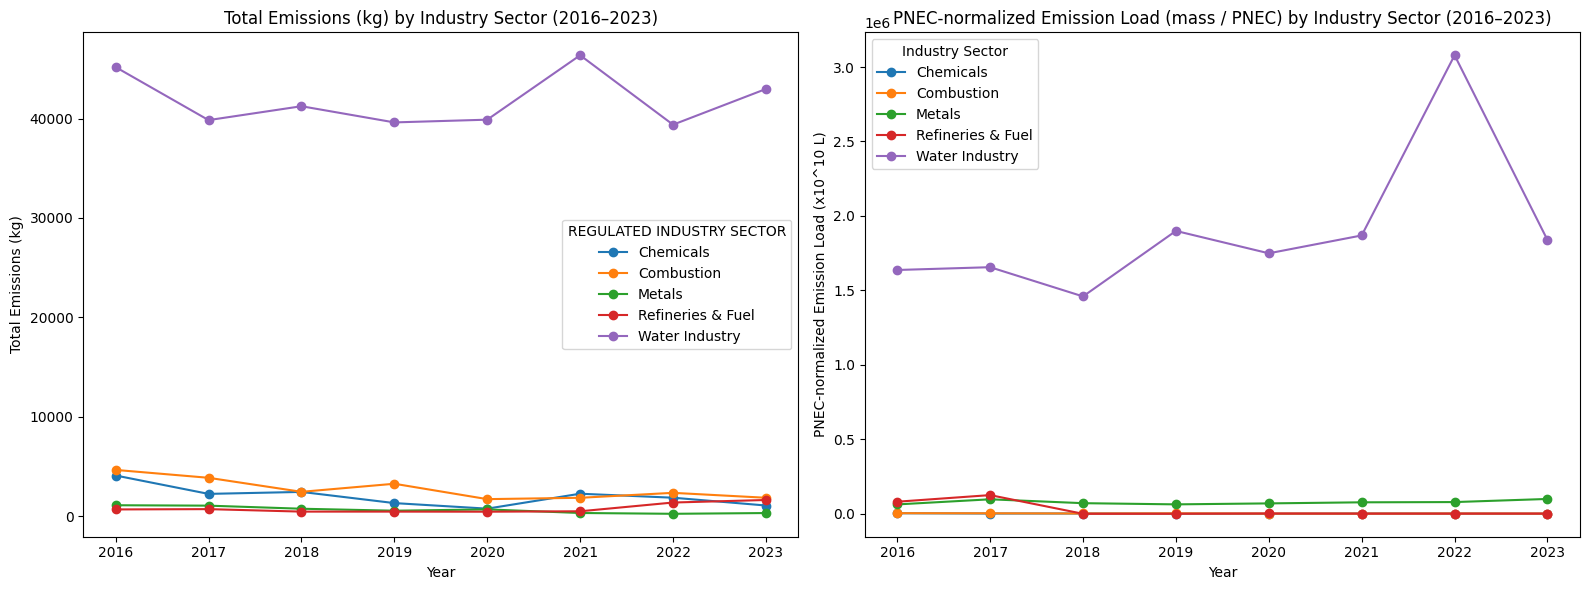

In [15]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

file_path = "merged_dataset_with_year.csv"
df = pd.read_csv(file_path)

pnec_values = {
    'Indeno(1,2,3-cd)pyrene': 1.7e-4,
    'Benzo(a)pyrene': 1.7e-4,
    'Cypermethrin': 3.0e-5,
    'Fluoranthene': 7.6e-4,
    'Copper': 1.0
}

df['PNEC (??G/L)'] = df['SUBSTANCE NAME'].map(pnec_values)

df['PNEC-normalized Emission Load'] = df['QUANTITY RELEASED (kg)'] / df['PNEC (??G/L)']

industry_total_pollution = df.groupby('REGULATED INDUSTRY SECTOR')['QUANTITY RELEASED (kg)'].sum()
industry_top5 = industry_total_pollution.sort_values(ascending=False).head(5)
df_top5 = df[df['REGULATED INDUSTRY SECTOR'].isin(industry_top5.index)]

industry_pollution_total = df_top5.groupby(['Year', 'REGULATED INDUSTRY SECTOR'])['QUANTITY RELEASED (kg)'].sum().unstack()

industry_pollution_normalized = df_top5.groupby(['Year', 'REGULATED INDUSTRY SECTOR'])['PNEC-normalized Emission Load'].sum().unstack()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

industry_pollution_total.plot(ax=axes[0], marker='o', title="Total Emissions (kg) by Industry Sector (2016–2023)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Total Emissions (kg)")

industry_pollution_normalized.plot(ax=axes[1], marker='o', title="PNEC-normalized Emission Load (mass / PNEC) by Industry Sector (2016–2023)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("PNEC-normalized Emission Load (x10^10 L)")

handles, labels = axes[0].get_legend_handles_labels()
axes[1].legend(handles, labels, title="Industry Sector", fontsize=10)

plt.tight_layout()
plt.show()
